<a href="https://colab.research.google.com/github/satyambhatt5/Natural-language-Processing-/blob/main/SLC10_nlp_using_deep_learning_Movie_review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
sns.set()


In [ ]:
review =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Artificial intelligence course /NLP/Hand ON+Project+Data /HandsOn/PROJECT-WORK/movie_reviews.csv")

In [ ]:
review.head()

,text,tag
0,"the necklace's hundred-year-old former owner ,...",pos
1,"the dialogue is warbling , and basically just ...",neg
2,considering that the skeptic's best argument a...,pos
3,with its appropriate mixture of high kicks and...,pos
4,admittedly i haven't seen an episode of the te...,neg


In [ ]:
review.shape

(64720, 2)

In [ ]:
from nltk import word_tokenize
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
stemmer=WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus=[]


In [ ]:
for i in range(0,64720):
  #remove the all special character 

  df=re.sub(r'\W',' ',review['text'][i])
  
  #Remove the all Single Character 

  df=re.sub(r'\s+[a-zA-Z]\s+',' ',df)

  #rempve the single Charcter from the document
  df=re.sub(r'\^[a-zA-Z]\s+',' ',df)

  #remove the multiple space and single space 

  df=re.sub(r'\s+',' ',df,flags=re.I)

  #converting the lowercase 
  df=df.lower()

  #lematization 

  df=df.split()

  df=[stemmer.lemmatize(word=w) for w in df]
  
  df=' '.join(df)
  corpus.append(df)

In [ ]:
corpus[0]

'the necklace hundred year old former owner rose dewitt bukater gloria stuart find brock to tell him her story'

In [ ]:
review.tag.value_counts()

pos    32937
neg    31783
Name: tag, dtype: int64

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.losses import categorical_crossentropy


In [ ]:
tokenizer =Tokenizer(num_words=2000,split=' ')

In [ ]:
tokenizer.fit_on_texts(corpus)

In [ ]:
X=tokenizer.texts_to_sequences(corpus)

In [ ]:
X[0]

[1, 1345, 85, 171, 755, 1229, 1524, 1845, 137, 4, 247, 57, 33, 66]

In [ ]:
corpus[0]

'the necklace hundred year old former owner rose dewitt bukater gloria stuart find brock to tell him her story'

In [ ]:
#tokenize word 

tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('of', 3), ('to', 4), ('is', 5), ('in', 6), ('it', 7), ('that', 8), ('a', 9), ('film', 10), ('with', 11), ('for', 12), ('his', 13), ('this', 14), ('he', 15), ('but', 16), ('on', 17), ('movie', 18), ('are', 19), ('by', 20), ('be', 21), ('one', 22), ('an', 23), ('who', 24), ('not', 25), ('you', 26), ('from', 27), ('at', 28), ('wa', 29), ('have', 30), ('they', 31), ('ha', 32), ('her', 33), ('all', 34), ('character', 35), ('like', 36), ('there', 37), ('so', 38), ('out', 39), ('about', 40), ('up', 41), ('more', 42), ('what', 43), ('when', 44), ('which', 45), ('or', 46), ('she', 47), ('their', 48), ('some', 49), ('time', 50), ('just', 51), ('can', 52), ('get', 53), ('if', 54), ('we', 55), ('scene', 56), ('him', 57), ('make', 58), ('into', 59), ('even', 60), ('only', 61), ('than', 62), ('no', 63), ('i', 64), ('good', 65), ('story', 66), ('most', 67), ('will', 68), ('would', 69), ('been', 70), ('much', 71), ('also', 72), ('other', 73), ('well', 74), ('do', 7

In [ ]:
#now we arrange in the same fashion

X=pad_sequences(X)

In [ ]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1, 1345,   85,
        171,  755, 1229, 1524, 1845,  137,    4,  247,   57,   33,   66],
      dtype=int32)

In [ ]:
#now find the shape 

X.shape

(64720, 121)

In [ ]:
Y= pd.get_dummies(review.tag)

In [ ]:
Y

,neg,pos
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
64715,0,1
64716,0,1
64717,1,0
64718,1,0


In [ ]:
#del model

In [ ]:
#buiding the model 
model=Sequential()

#devloping the embedding the model 
model.add(Embedding(2000,128,input_length=121))

#spacial layer 
model.add(SpatialDropout1D(0.3))

#layer 
model.add(LSTM(units=196,activation='tanh',dropout=0.2))

#layer 
model.add(Dense(units=2,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 121, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 121, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#now compile the model

model.compile(optimizer='Adam',loss=categorical_crossentropy,metrics=['acc'])

In [ ]:
#fit the model

model_history=model.fit(x=X,y=Y,epochs=10,validation_split=.1)

Epoch 1/10
1821/1821 [==============================] - 26s 14ms/step - loss: 0.6676 - acc: 0.5858 - val_loss: 0.6278 - val_acc: 0.6494
Epoch 2/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.6083 - acc: 0.6666 - val_loss: 0.6295 - val_acc: 0.6454
Epoch 3/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.5896 - acc: 0.6808 - val_loss: 0.6261 - val_acc: 0.6539
Epoch 4/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.5725 - acc: 0.6940 - val_loss: 0.6379 - val_acc: 0.6497
Epoch 5/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.5579 - acc: 0.7023 - val_loss: 0.6489 - val_acc: 0.6442
Epoch 6/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.5398 - acc: 0.7177 - val_loss: 0.6512 - val_acc: 0.6414
Epoch 7/10
1821/1821 [==============================] - 25s 14ms/step - loss: 0.5248 - acc: 0.7279 - val_loss: 0.6688 - val_acc: 0.6363
Epoch 8/10
1821/1821 [==========================

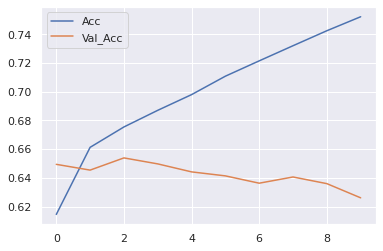

In [ ]:
plt.plot(model_history.history["acc"], label="Acc")
plt.plot(model_history.history["val_acc"], label="Val_Acc")
plt.legend()

No handles with labels found to put in legend.


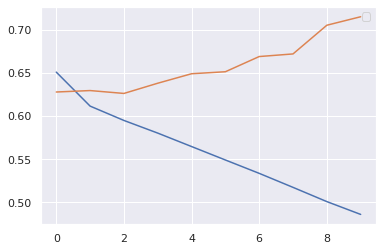

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend()

In [ ]:
from spacy.lang.en import English
from spacy.lang.



SyntaxError: ignored

SyntaxError: ignored